<a href="https://colab.research.google.com/github/Rayyan-Prog-ML/Brain-_tumour/blob/main/Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Kaggle API Setup**

**Create Directory**→ Ensures the ~/.kaggle folder exists.

**Move API Key** → Moves kaggle.json (Kaggle API key) to the correct location.

**Set Permissions**→ Restricts access to the API key for security.

In [ ]:
import os

# Move kaggle.json to the correct location
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/

# Set permissions
!chmod 600 ~/.kaggle/kaggle.json


mv: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


**Downloading Brain-Tumor-Dataset**

Downloading the Brain-Tumor-Dataset by the help of API

In [ ]:
w!kaggle datasets download -d masoudnickparvar/brain-tumor-mri-dataset




Dataset URL: https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset
License(s): CC0-1.0
 90% 134M/149M [00:00<00:00, 211MB/s]
100% 149M/149M [00:00<00:00, 206MB/s]


In [ ]:
# Unzip the dataset
!unzip brain-tumor-mri-dataset.zip -d brain_tumor_dataset

Streaming output truncated to the last 5000 lines.
  inflating: brain_tumor_dataset/Training/glioma/Tr-gl_0712.jpg  
  inflating: brain_tumor_dataset/Training/glioma/Tr-gl_0713.jpg  
  inflating: brain_tumor_dataset/Training/glioma/Tr-gl_0714.jpg  
  inflating: brain_tumor_dataset/Training/glioma/Tr-gl_0715.jpg  
  inflating: brain_tumor_dataset/Training/glioma/Tr-gl_0716.jpg  
  inflating: brain_tumor_dataset/Training/glioma/Tr-gl_0717.jpg  
  inflating: brain_tumor_dataset/Training/glioma/Tr-gl_0718.jpg  
  inflating: brain_tumor_dataset/Training/glioma/Tr-gl_0719.jpg  
  inflating: brain_tumor_dataset/Training/glioma/Tr-gl_0720.jpg  
  inflating: brain_tumor_dataset/Training/glioma/Tr-gl_0721.jpg  
  inflating: brain_tumor_dataset/Training/glioma/Tr-gl_0722.jpg  
  inflating: brain_tumor_dataset/Training/glioma/Tr-gl_0723.jpg  
  inflating: brain_tumor_dataset/Training/glioma/Tr-gl_0724.jpg  
  inflating: brain_tumor_dataset/Training/glioma/Tr-gl_0725.jpg  
  inflating: brain_tumor_

**Importing Required Libraries**

**PyTorch & Torchvision**→ Used for deep learning and dataset handling.

**transforms** → Applies data augmentation and preprocessing.

**datasets** → Loads built-in datasets.

**DataLoader** → Handles batch loading of data.

**efficientnet_b4** → Loads the EfficientNet-B4 model with pre-trained weights.

**InterpolationMode** → Defines resizing interpolation for image transformations.

**optim** → Contains optimizers for training the model.

**LRScheduler & ReduceLROnPlateau** → Adjusts the learning rate based on model performance.

In [ ]:
!pip install skorch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.9/228.9 kB 4.6 MB/s eta 0:00:00


In [ ]:
import torch
import torchvision.transforms as transforms
from torchvision import datasets
from torch.utils.data import DataLoader
from torchvision.models import efficientnet_b4, EfficientNet_B4_Weights
from torchvision.transforms.functional import InterpolationMode
import torch.optim as optim
from skorch.callbacks import EarlyStopping, LRScheduler
from torch.optim.lr_scheduler import ReduceLROnPlateau

**Image Transformations**

**Preprocessing for EfficientNet-B4** → Uses built-in transformations from EfficientNet_B4_Weights.IMAGENET1K_V1.

**Standardization** → Applies necessary resizing, normalization, and augmentation to match ImageNet-trained model requirements.

In [ ]:
#Transformations that are required for the model
transform=EfficientNet_B4_Weights.IMAGENET1K_V1.transforms()

**Dataset Loading & Dataloaders**

**Dataset Path** → Points to the brain_tumor_dataset.

**Train & Validation Datasets** → Loads images from Training and Testing folders using ImageFolder.

**Transformations** → Applies EfficientNet-B4 preprocessing.
Batch Size → Set to 8 for training and validation.

**DataLoader →**



*   train_loader → Shuffles data for randomness in training.
*   val_loader → No shuffling to maintain evaluation consistency.


**Class Labels** → Prints the class names in the dataset.

In [ ]:
dataset_path='brain_tumor_dataset'

train_dataset=datasets.ImageFolder(root=f'{dataset_path}/Training', transform=transform)
val_dataset=datasets.ImageFolder(root=f'{dataset_path}/Testing', transform=transform)

#Create dataloaders
batch_size=8
train_loader=DataLoader(train_dataset,batch_size=batch_size,shuffle=True, num_workers=0)
val_loader=DataLoader(val_dataset,batch_size=batch_size,shuffle=False, num_workers=0)

print(train_dataset.classes)

['glioma', 'meningioma', 'notumor', 'pituitary']


In [ ]:
print(val_dataset.classes)

['glioma', 'meningioma', 'notumor', 'pituitary']


**Code for printing the first 7 images**


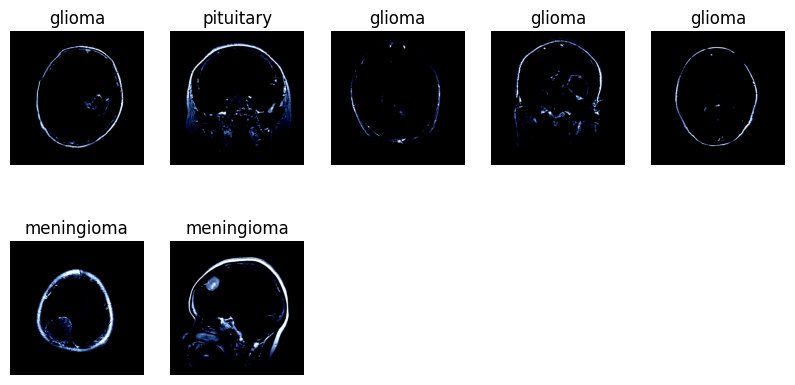

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

images, labels = next(iter(train_loader))
# Print the first 7 images
fig = plt.figure(figsize=(10, 5))
for i in range(7):
  ax = fig.add_subplot(2, 5, i + 1)
  ax.imshow(np.transpose(images[i].numpy(), (1, 2, 0)))  # Convert to numpy and transpose for display
  ax.set_title(train_dataset.classes[labels[i]])
  ax.axis('off')

plt.show()


**Pre-Trained Model**

Deep convolutional neural network models may take days or even weeks to train on very large datasets.

A way to short-cut this process is to re-use the model weights from pre-trained models that were developed for standard computer vision benchmark datasets, such as the ImageNet image recognition tasks. Top performing models can be downloaded and used directly, or integrated into a new model for your own computer vision problems.

In this project, I'll be using the EfficientNet-B4 model which will use the weights from the ImageNet dataset.

**Note**

Setting  model paramters to false moves all the layer's weights from trainable to non-trainable. This is called "freezing" the layer: the state of a frozen layer won't be updated during training

In [ ]:
# Load EfficientNet-B4 with pretrained weights
model = efficientnet_b4(weights=EfficientNet_B4_Weights.IMAGENET1K_V1)
print(model)

EfficientNet(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 48, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(48, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): SiLU(inplace=True)
    )
    (1): Sequential(
      (0): MBConv(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(48, 48, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=48, bias=False)
            (1): BatchNorm2d(48, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): SiLU(inplace=True)
          )
          (1): SqueezeExcitation(
            (avgpool): AdaptiveAvgPool2d(output_size=1)
            (fc1): Conv2d(48, 12, kernel_size=(1, 1), stride=(1, 1))
            (fc2): Conv2d(12, 48, kernel_size=(1, 1), stride=(1, 1))
            (activation): SiLU(inplace=True)
            (scale_activation): Sigmoid()
          )
          (2): Conv2dNormActiv

**Loss, Optimizer, and Device Setup**

**Loss Function** → CrossEntropyLoss() for multi-class classification.

**Optimizer** → Adam optimizer with a learning rate of 1e-4.

**Device Assignment** → Uses GPU (CUDA) if available, else defaults to CPU.

In [ ]:
criterion = torch.nn.CrossEntropyLoss()
optimizer = optim.Adam(model.classifier.parameters(), lr=1e-4)

In [ ]:
device=torch.device('cuda' if torch.cuda.is_available() else 'cpu')

**7. Modifying the Classification layer**

**Fully Connected Layers** → Three linear layers added for classification.
**Hidden Layers** → Uses 1024 and 512 neurons in intermediate layers.
**Activation Function** → ReLU applied after each hidden layer for non-linearity.
**Dropout** → 50% dropout used to prevent overfitting.
**Output Layer** → Maps to num_classes for final predictions.

In [ ]:
torch.cuda.empty_cache()

In [ ]:
# ReduceLROnPlateau
scheduler = ReduceLROnPlateau(optimizer, mode='min', patience=2, factor=0.5, verbose=True)

In [ ]:
num_features = model.classifier[1].in_features
num_classes = len(train_dataset.classes)

model.classifier = torch.nn.Sequential(
    torch.nn.Linear(num_features, 1024),
    torch.nn.ReLU(),
    torch.nn.Dropout(0.5),
    torch.nn.Linear(1024, 512),
    torch.nn.ReLU(),
    torch.nn.Dropout(0.5),
    torch.nn.Linear(512, num_classes)
).to(device)

#Freeze the Convolution layers
for param in model.parameters():
  param.requires_grad=False

# Unfreeze classifier parameters
for param in model.classifier.parameters():
    param.requires_grad = True


**Training and validation**

**callback** -> set of functions to be applied at given stages of the training procedure. You can use callbacks to get a view on internal states and statistics of the model during training.

**ReduceLROnPlateau** -> reduce learning rate when a metric has stopped improving.

**ModelCheckpoint** -> callback to save the Keras model or model weights at some frequency.

**Performance Logging** → Displays epoch-wise training loss, validation loss, and accuracy.

**Validation Phase** → Evaluates the model on the validation set, calculates loss and accuracy.

**Training Phase** → Loops through the training data, computes loss, backpropagates, and updates model weights.

In [ ]:
print(f"Classes in Training Set: {train_dataset.classes}")
print(f"Classes in Validation Set: {val_dataset.classes}")

# Initialize lists to store true and predicted labels
y_true = []
y_pred = []
train_loss = []  # Store training loss
val_loss = []  # Store validation loss
train_acc = []  # Store training accuracy
val_acc = []  # Store validation accuracy

num_epochs = 25

# Training Loop
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct_train = 0
    total_train = 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        train_loss.append(loss.item())  # Append training loss

        _, predicted = torch.max(outputs, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

    avg_train_loss = running_loss / len(train_loader)
    train_accuracy = 100 * correct_train / total_train
    train_acc.append(train_accuracy)  # Store training accuracy

    # Validation Phase
    model.eval()
    val_running_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_running_loss += loss.item()

            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

            # Append true and predicted labels
            y_true.extend(labels.cpu().numpy())
            y_pred.extend(predicted.cpu().numpy())

            val_loss.append(loss.item())  # Store validation loss

    avg_val_loss = val_running_loss / len(val_loader)
    val_accuracy = 100 * correct / total
    val_acc.append(val_accuracy)  # Store validation accuracy

    print(f"Epoch [{epoch + 1}/{num_epochs}] | Train Loss: {avg_train_loss:.4f} | Val Loss: {avg_val_loss:.4f} | Val Acc: {val_accuracy:.2f}%")

    # Update Learning Rate
    scheduler.step(avg_val_loss)


Classes in Training Set: ['glioma', 'meningioma', 'notumor', 'pituitary']
Classes in Validation Set: ['glioma', 'meningioma', 'notumor', 'pituitary']
Using Device: cuda


/usr/local/lib/python3.11/dist-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch [1/25] | Train Loss: 0.6879 | Val Loss: 0.4444 | Val Acc: 82.76%
Epoch [2/25] | Train Loss: 0.3892 | Val Loss: 0.3578 | Val Acc: 85.81%
Epoch [3/25] | Train Loss: 0.3308 | Val Loss: 0.2830 | Val Acc: 89.17%
Epoch [4/25] | Train Loss: 0.3075 | Val Loss: 0.2593 | Val Acc: 89.70%
Epoch [5/25] | Train Loss: 0.2724 | Val Loss: 0.2386 | Val Acc: 90.31%
Epoch [6/25] | Train Loss: 0.2585 | Val Loss: 0.2117 | Val Acc: 91.08%
Epoch [7/25] | Train Loss: 0.2416 | Val Loss: 0.2026 | Val Acc: 92.22%
Epoch [8/25] | Train Loss: 0.2262 | Val Loss: 0.2076 | Val Acc: 91.23%
Epoch [9/25] | Train Loss: 0.2241 | Val Loss: 0.1837 | Val Acc: 92.22%
Epoch [10/25] | Train Loss: 0.2035 | Val Loss: 0.1880 | Val Acc: 92.37%
Epoch [11/25] | Train Loss: 0.1925 | Val Loss: 0.1882 | Val Acc: 92.30%
Epoch [12/25] | Train Loss: 0.1946 | Val Loss: 0.1770 | Val Acc: 92.91%
Epoch [13/25] | Train Loss: 0.1774 | Val Loss: 0.1597 | Val Acc: 93.52%
Epoch [14/25] | Train Loss: 0.1673 | Val Loss: 0.1464 | Val Acc: 93.90%
E

**Model Evaluation**


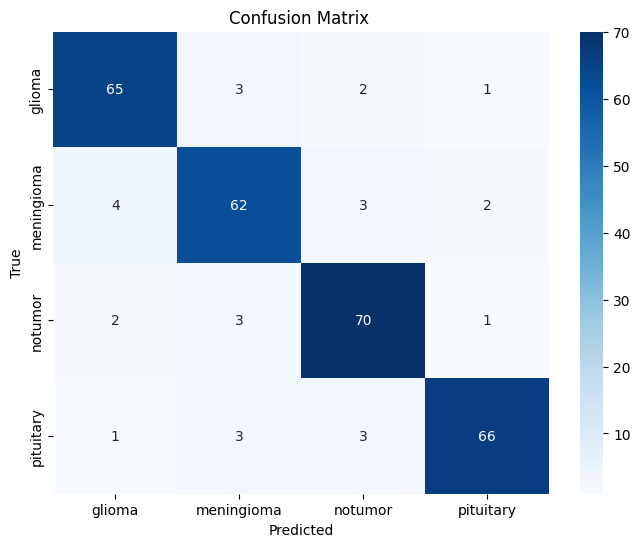

In [ ]:
from matplotlib import  pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Create confusion matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=train_dataset.classes, yticklabels=train_dataset.classes)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

**Learning Curves**

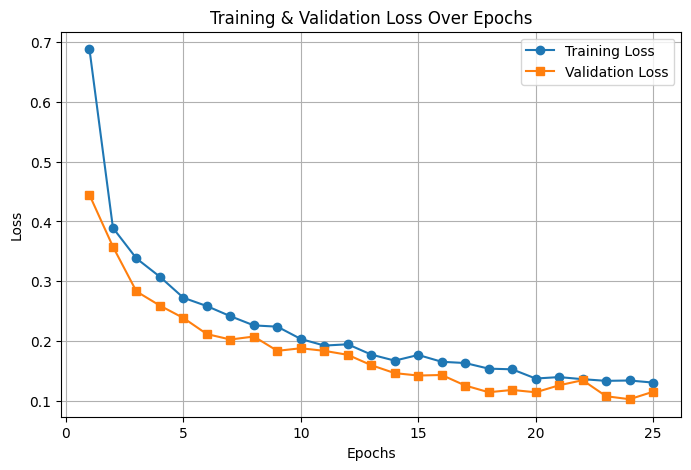

In [ ]:
# Plot the loss curves
plt.figure(figsize=(8, 5))
plt.plot(epochs, train_loss, label="Training Loss", marker='o')
plt.plot(epochs, val_loss, label="Validation Loss", marker='s')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training & Validation Loss Over Epochs")
plt.legend()
plt.grid()
plt.show()


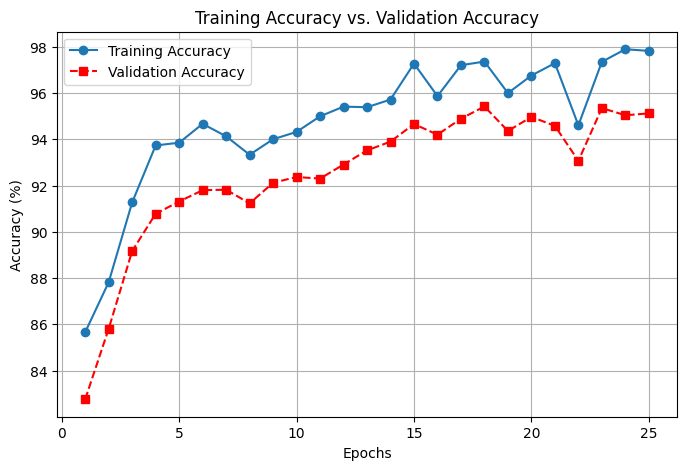

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(num_epochs, train_acc, label="Training Accuracy", marker='o-', color='blue')
plt.plot(num_epochs, val_acc, label="Validation Accuracy", marker='s--', color='red')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Validation Accuracy Over Epochs")
plt.legend()
plt.grid()
plt.show()
